Run the clustering and plot the shapes per cluster
==

In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
from corr_cluster import Peak,BetaLike,CorrCluster
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Grab all of the peakml files

In [59]:
file_path = '/Users/simon/Dropbox/BioResearch/Meta_clustering/JoeDataProcessing/All_Standards/std1/pos/'
files = [f for f in os.listdir(file_path) if f.endswith('.peakml')]
csv_path = file_path + 'csv/'

Pick one of the files

In [72]:
fi = files[0]
csv_file = csv_path + fi.split('.')[0] + '.csv'
corr_file = csv_path + fi.split('.')[0] + '.corr.mat'
signal_file = csv_path + fi.split('.')[0] + '.signal'
print fi

std1_Beer_esi_02022012.peakml


Create the cluster object

In [62]:
bl = BetaLike()
cc = CorrCluster(bl,csv_file,corr_file,signal_file)

2767.449951171875:
Loaded 9752 peaks
Reading shape correlations from /Users/simon/Dropbox/BioResearch/Meta_clustering/JoeDataProcessing/All_Standards/std1/pos/csv/std1_Beer_esi_02022012.corr.mat
Greedy clustering done, resulting in 3191 clusters


Get the peaks ordered by cluster

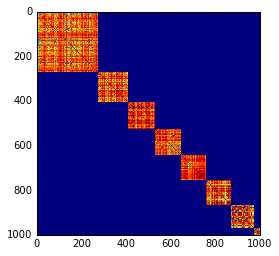

In [73]:
op,order = cc.get_peaks_by_cluster()
cxd = cc.cx.todense()
cxd = cxd[order,:]
cxd = cxd[:,order]
plt.imshow(cxd[:1000,:1000])

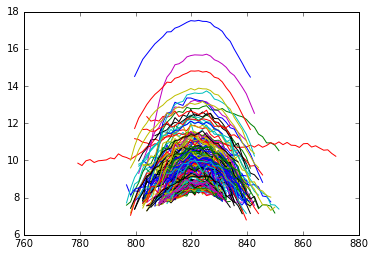

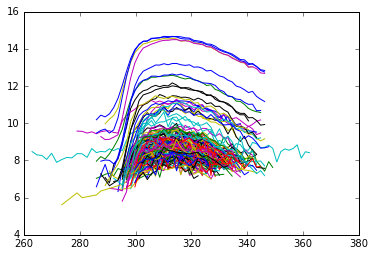

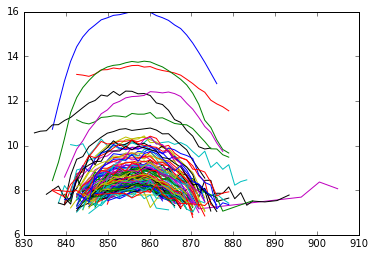

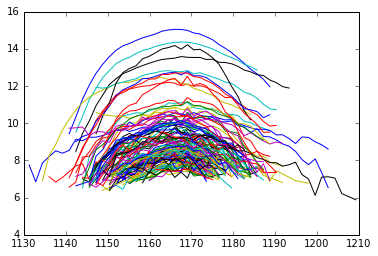

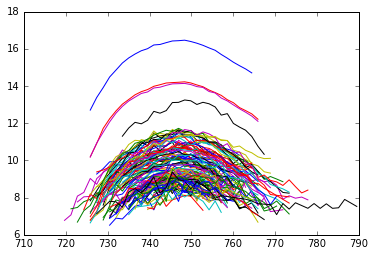

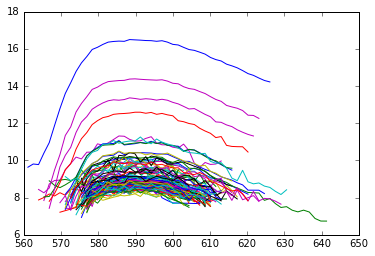

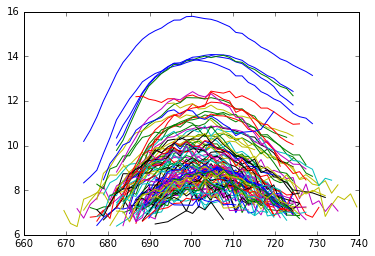

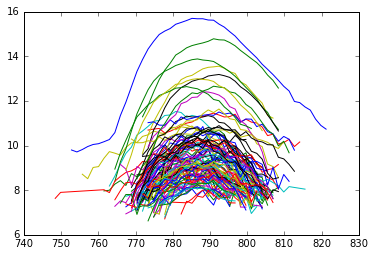

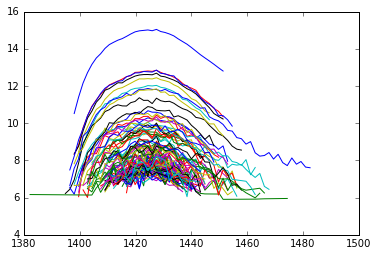

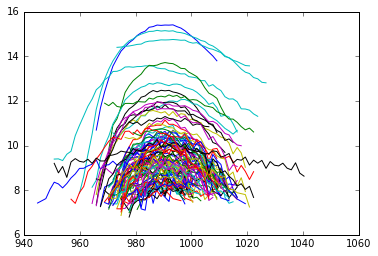

In [74]:
for i in range(10):
    cl = cc.clusters[i]
    plt.figure()
    for peak in cl.members:
        plt.plot(peak.signal.x,np.log(peak.signal.y))